# Environment

### Libraries and environment variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import nbconvert

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option("display.max_columns", None)
# formatter
%reload_ext nb_black

# set figure size globally
# plt.rcParams["figure.figsize"] = (10, 13)

<IPython.core.display.Javascript object>

### Set working directory

In [2]:
import os
from pathlib import Path

# get absolute path of this script and create Path object
path = Path(os.getcwd())

# use Path object to get path of project folder
absolutePath = path.parent.absolute()

# change working directory to project folder
os.chdir(absolutePath)

# get path of project folder
path_projectFolder = os.getcwd()

<IPython.core.display.Javascript object>

### Load Data

In [3]:
test1 = pd.read_csv(path_projectFolder + "/data/test_1.csv")
test2 = pd.read_csv(path_projectFolder + "/data/test_2.csv")
test3 = pd.read_csv(path_projectFolder + "/data/test_3.csv")
test4 = pd.read_csv(path_projectFolder + "/data/test_4.csv")

<IPython.core.display.Javascript object>

In [4]:
# Drop all empty columns from tests
listTests = [test1, test2, test3, test4]

for t in listTests:
    t.dropna(how="all", axis=1, inplace=True)

test1.head()

,Unnamed: 0,Test,Stufe,unique_id,Level,Gesamt_Level,1,2,3,4,5,6,7,8,9,10
0,0,1,1,404_0,C,C,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1,1,1,404_1,A,A,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2,1,1,404_10,B,B,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
3,3,1,1,404_11,A,A,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,4,1,1,404_12,B,C,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


<IPython.core.display.Javascript object>

# EDA

### Items per test

In [5]:
print(
    "\n",
    "Subtest 1 item count: 10",
    "\n",
    "Subtest 2 item count: 10",
    "\n",
    "Subtest 3 item count: 50",
    "\n",
    "Subtest 4 item count: 30 ",
    "\n",
)


 Subtest 1 item count: 10 
 Subtest 2 item count: 10 
 Subtest 3 item count: 50 
 Subtest 4 item count: 30  



<IPython.core.display.Javascript object>

### Children

In [6]:
anzahl1 = len(test1)
anzahl2 = len(test2)
anzahl3 = len(test3)
anzahl4 = len(test4)
print(
    "\n",
    "Subtest 1 Kinder:",
    anzahl1,
    "\n",
    "Subtest 2 Kinder:",
    anzahl2,
    "\n",
    "Subtest 3 Kinder:",
    anzahl3,
    "\n",
    "Subtest 4 Kinder:",
    anzahl4,
    "\n",
)


 Subtest 1 Kinder: 51 
 Subtest 2 Kinder: 52 
 Subtest 3 Kinder: 51 
 Subtest 4 Kinder: 46 



<IPython.core.display.Javascript object>

### 1. Final level

In [7]:
# stacked barchart for level
def level_stacked(df, title, column):
    dataToPlott = df[column].value_counts(normalize=True) * 100

    dataToPlott2 = pd.DataFrame(dataToPlott)

    dataToPlott2["level"] = dataToPlott2.index

    dataToPlott2 = dataToPlott2.transpose()

    dataToPlott2 = dataToPlott2.head(-1)

    dataToPlott2 = dataToPlott2[["A", "B", "C"]]
    print(dataToPlott2)

    
    dataToPlott2.plot(kind="barh", stacked=True, color=co)

    plt.legend(["level A", "level B", "level C"], bbox_to_anchor=(1.0, 1))

    plt.xlabel("%")

    plt.xticks([0, 10, 20, 30, 40, 50, 50, 60, 70, 80, 90, 100])
    plt.title(title)


# histogram for subtest level
def level_histogram(df, title, colors, figurename):
    dataToPlott = df["subtest_result"].value_counts(normalize=True) * 100
    dataToPlott2 = pd.DataFrame(dataToPlott)
    dataToPlott_sorted = dataToPlott2.sort_values("subtest_result")
    dataToPlott_sorted
    dataToPlott_sorted["subtest_result"].plot(kind="barh", color=co)
    plt.title(title)


# colors for bars
co = [
    "lightsteelblue",
    "cornflowerblue",
    "royalblue",
]


<IPython.core.display.Javascript object>

nur Kinder, die auch Test 4 gemacht haben:

                     A          B          C
Gesamt_Level  2.173913  34.782609  63.043478


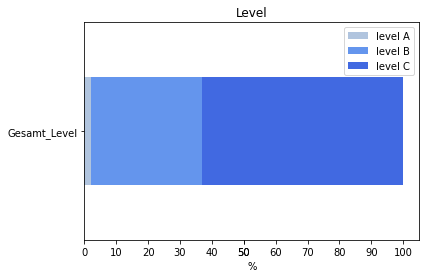

<IPython.core.display.Javascript object>

In [8]:
level_stacked(test4, "Level", "Gesamt_Level")

inklusive Kindern, die Test 4 nicht gemacht haben:

                     A          B          C
Gesamt_Level  9.803922  31.372549  56.862745


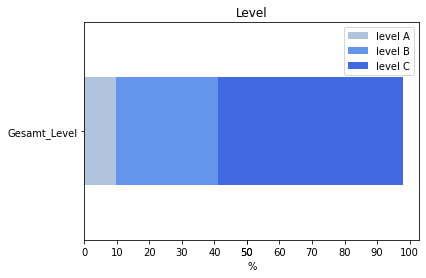

<IPython.core.display.Javascript object>

In [9]:
level_stacked(test3, "Level", "Gesamt_Level")

### 2. Subtest level

#### Subtest 1 Level

               A          B          C
Level  17.647059  25.490196  56.862745


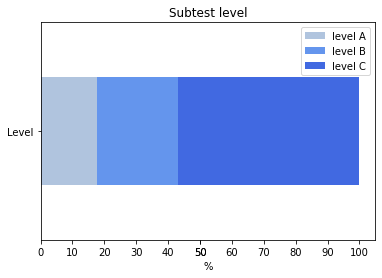

<IPython.core.display.Javascript object>

In [10]:
level_stacked(test1, "Subtest level", "Level")

#### Subtest 2 Level

               A     B          C
Level  17.307692  25.0  55.769231


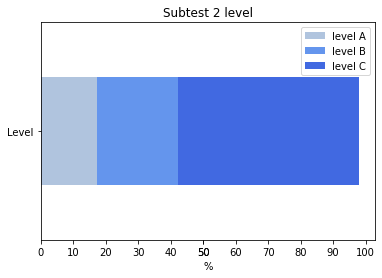

<IPython.core.display.Javascript object>

In [11]:
level_stacked(test2, "Subtest 2 level", "Level")

#### Subtest 3 Level

              A          B          C
Level  9.803922  25.490196  64.705882


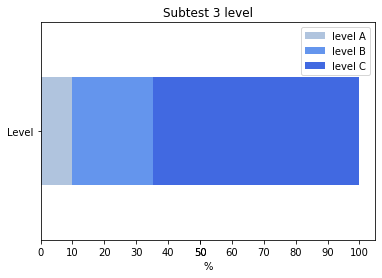

<IPython.core.display.Javascript object>

In [12]:
level_stacked(test3, "Subtest 3 level", "Level")

#### Subtest 4 Level

               A          B          C
Level  13.043478  26.086957  60.869565


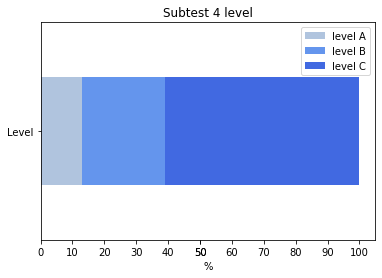

<IPython.core.display.Javascript object>

In [13]:
level_stacked(test4, "Subtest 4 level", "Level")

### 4. Item Difficulty --> Results of Subtest Items

#### Participation/Motivation

In [14]:
def missing_values_per_variable(df, percent=100, dropCol=False):  # sum_missing_values

    ergebnis = df[
        df.columns.difference(
            [
                "Unnamed: 0",
                "Test",
                "Stufe",
                "unique_id",
                "Level",
                "Gesamt_Level",
                "Gesamt_Richtig",
            ]
        )
    ].columns

    # ergebnis = [col for col in df.columns if "ergebnis" in col]
    selectedData = df[ergebnis]
    selectedData.replace(99, np.NaN, inplace=True)
    listCol = []
    rowCount = selectedData.shape[0]
    for column in selectedData:
        sumColumn = selectedData[column].isna().sum()
        percentNA = sumColumn / rowCount * 100
        if percentNA <= percent:
            listCol.append(
                {
                    "column": column,
                    "missing_values": sumColumn,
                    "missing_values(%)": percentNA,
                }
            )
        else:
            if dropCol == True:
                print("Column dropped: ", column, ", missing values(%): ", percentNA)
                selectedData.drop([column], axis=1, inplace=True)
    listCol = (
        pd.DataFrame(listCol)
        .sort_values(by="missing_values", ascending=False)
        .reset_index(drop=True)
    )

    listCol.index = listCol["column"]
    listCol.drop("column", axis=1, inplace=True)

    return listCol

<IPython.core.display.Javascript object>

#### Subtest 1: Missing values

In [15]:
missing_values = missing_values_per_variable(test1)
print("Kinder:", anzahl1)
missing_values.head()

Kinder: 51


,missing_values,missing_values(%)
column,,
10,5,9.803922
4,4,7.843137
9,2,3.921569
3,1,1.960784
5,1,1.960784


<IPython.core.display.Javascript object>

#### Subtest 2: Missing values

In [16]:
missing_values = missing_values_per_variable(test2)
print("Kinder:", anzahl2)
missing_values.head()

Kinder: 52


,missing_values,missing_values(%)
column,,
10,12,23.076923
8,6,11.538462
2,5,9.615385
9,5,9.615385
7,4,7.692308


<IPython.core.display.Javascript object>

#### Subtest 3: Missing values

In [17]:
missing_values = missing_values_per_variable(test3)
print("Kinder:", anzahl3)
missing_values.head(+10)

Kinder: 51


,missing_values,missing_values(%)
column,,
50,32,62.745098
48,31,60.784314
49,30,58.823529
47,29,56.862745
46,29,56.862745
43,27,52.941176
45,27,52.941176
44,27,52.941176
42,26,50.980392


<IPython.core.display.Javascript object>

#### Subtest 4: Missing values

In [18]:
missing_values = missing_values_per_variable(test4)
print("Kinder:", anzahl4)
missing_values.head(+10)

Kinder: 46


,missing_values,missing_values(%)
column,,
29,35,76.086957
30,34,73.913043
28,34,73.913043
27,32,69.565217
26,30,65.217391
25,29,63.043478
21,25,54.347826
24,25,54.347826
20,24,52.173913


<IPython.core.display.Javascript object>

In [19]:
def getFrequencies(df):

    """Aim : To plot data, calculate frequencies of column values
    Result : DF with frequencies and df with freqencies in percentages"""

    ergebnis = test_results = df[
        df.columns.difference(
            [
                "Unnamed: 0",
                "Test",
                "Stufe",
                "unique_id",
                "Level",
                "Gesamt_Level",
                "Gesamt_Richtig",
            ]
        )
    ].columns
    ergebnis = [int(x) for x in ergebnis]
    ergebnis.sort()
    ergebnis = [str(x) for x in ergebnis]
    # ergebnis = [col for col in df.columns if "ergebnis" in col]
    selectedData = df[ergebnis]
    frequencies = {}
    for value in selectedData.columns:
        frequencies[value] = selectedData[value].value_counts()
    data = pd.DataFrame(frequencies)
    dataToPlot = data.transpose()
    dataToPlot_percentages = dataToPlot.div(dataToPlot.sum(axis=1), axis=0) * 100
    dataToPlot_percentages = dataToPlot_percentages[[1, 0, 99]]
    return dataToPlot_percentages, dataToPlot


def plotFrequencies(df, width, height, title, legend, ylabel, xlabel, color):

    """Aim : To plot data, calculate frequencies of column values
    Result : DF with frequencies and df with freqencies in percentages"""

    df.plot(figsize=(width, height), kind="bar", stacked=True, color=colors)
    plt.legend(legend, bbox_to_anchor=(1, 1))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # plt.xticks([0, 10, 20, 30, 40, 50, 50, 60, 70, 80, 90, 100])
    # plt.vlines(x=85, color="r", linestyle="--")
    plt.axhline(y=85, color="black", linestyle="--")
    plt.show()


colors = ["g", "r", "b"]
legend = ["richtig", "falsch", "unbeantwortet"]

<IPython.core.display.Javascript object>

#### Subtest 1 : Item results

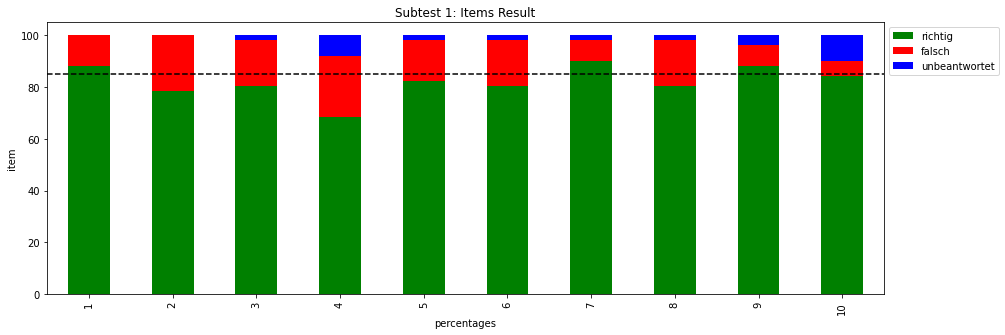

<IPython.core.display.Javascript object>

In [20]:
test1_frequencies_percentages = getFrequencies(test1)[0]
plotFrequencies(
    test1_frequencies_percentages,
    15,
    5,
    "Subtest 1: Items Result",
    legend=legend,
    xlabel="percentages",
    ylabel="item",
    color=colors,
)

#### Subtest 2: Item results

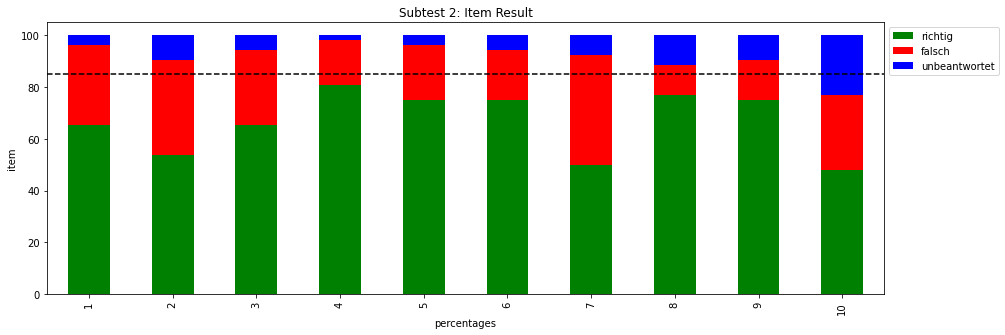

<IPython.core.display.Javascript object>

In [21]:
test2_frequencies_percentages = getFrequencies(test2)[0]

plotFrequencies(
    test2_frequencies_percentages,
    15,
    5,
    "Subtest 2: Item Result",
    legend=legend,
    xlabel="percentages",
    ylabel="item",
    color=colors,
)

#### Subtest 3: Item results

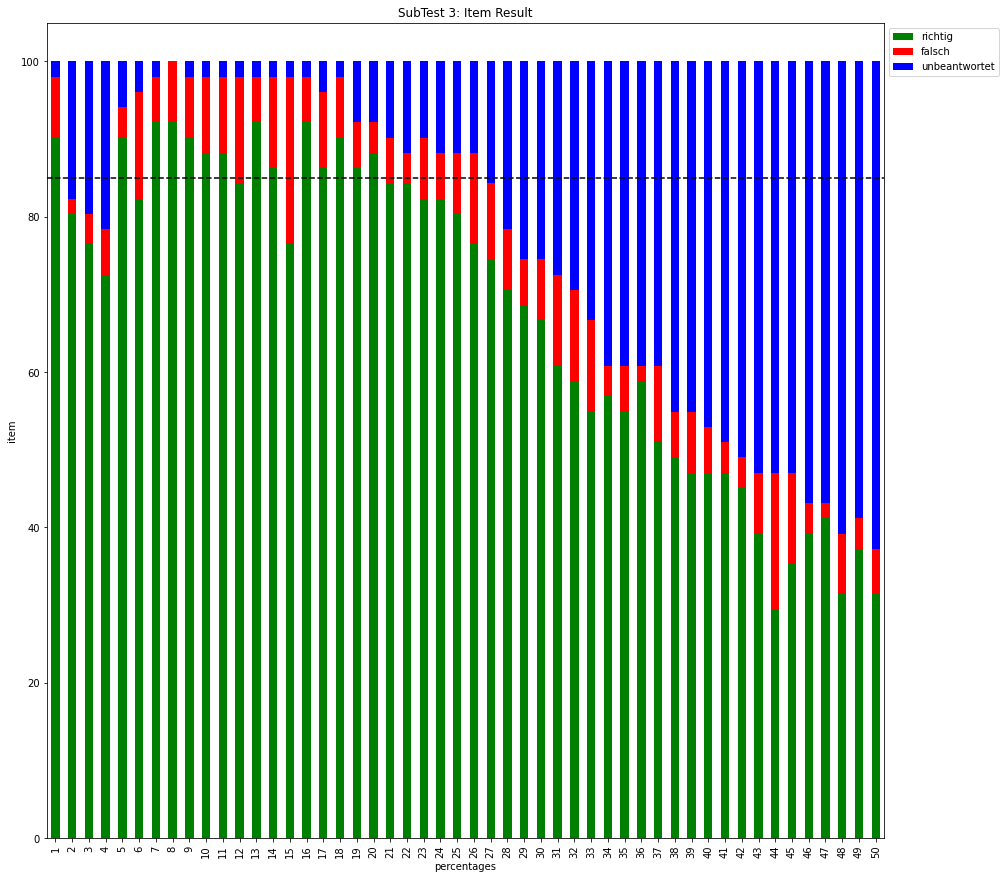

<IPython.core.display.Javascript object>

In [22]:
test3_frequencies_percentages = getFrequencies(test3)[0]

plotFrequencies(
    test3_frequencies_percentages,
    15,
    15,
    "SubTest 3: Item Result",
    legend=legend,
    xlabel="percentages",
    ylabel="item",
    color=colors,
)

#### Subtest 4 : Item results

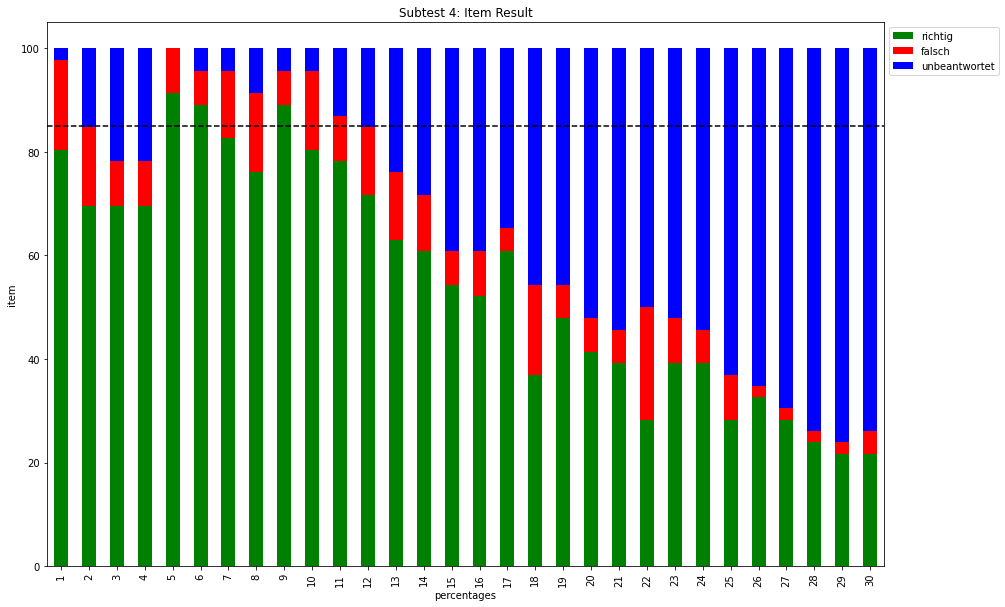

<IPython.core.display.Javascript object>

In [23]:
test4_frequencies_percentages = getFrequencies(test4)[0]

plotFrequencies(
    test4_frequencies_percentages,
    15,
    10,
    "Subtest 4: Item Result",
    legend=legend,
    xlabel="percentages",
    ylabel="item",
    color=colors,
)

### 5. Correlations
Are there significant correlations (> 0.85) between false answers and no response?

In [24]:
# calculate correlation
def correlation(df, col1, col2, text=""):
    column_1 = df[col1]
    column_2 = df[col2]
    correlation = column_1.corr(column_2)
    print(text, correlation)
    return correlation

<IPython.core.display.Javascript object>

#### Subtest 1

In [25]:
dataToPlot1 = getFrequencies(test1)
dataToPlot1 = dataToPlot1[0]
correlation_1 = correlation(
    dataToPlot1, 0, 99, text="Subtest 1, Correlation false & unanswered: "
)

Subtest 1, Correlation false & unanswered:  -0.16724840200141827


<IPython.core.display.Javascript object>

#### Subtest 2

In [26]:
# Test 2
dataToPlot2 = getFrequencies(test2)
dataToPlot2 = dataToPlot2[0]
correlation_2 = correlation(
    dataToPlot2, 0, 99, text="Subtest 2, Correlation false & unanswered: "
)

Subtest 2, Correlation false & unanswered:  0.09483094592136888


<IPython.core.display.Javascript object>

#### Subtest 3

In [27]:
dataToPlot3 = getFrequencies(test3)
dataToPlot3 = dataToPlot3[0]
correlation_3 = correlation(
    dataToPlot3, 0, 99, text="Subtest 3, Correlation false & unanswered: "
)

Subtest 3, Correlation false & unanswered:  -0.22201116427028048


<IPython.core.display.Javascript object>

#### Subtest 4

In [28]:
dataToPlot4 = getFrequencies(test4)
dataToPlot4 = dataToPlot4[0]
correlation_4 = correlation(
    dataToPlot4, 0, 99, text="Subtest 4, Correlation false & unanswered: "
)

Subtest 4, Correlation false & unanswered:  -0.5491691547746677


<IPython.core.display.Javascript object>

## Class level

### Subtest 1

In [29]:
# class level
grouped = test1.groupby(test1.Stufe)
test1_level_1 = grouped.get_group(1)
test1_level_2 = grouped.get_group(2)

<IPython.core.display.Javascript object>

#### Class level 1

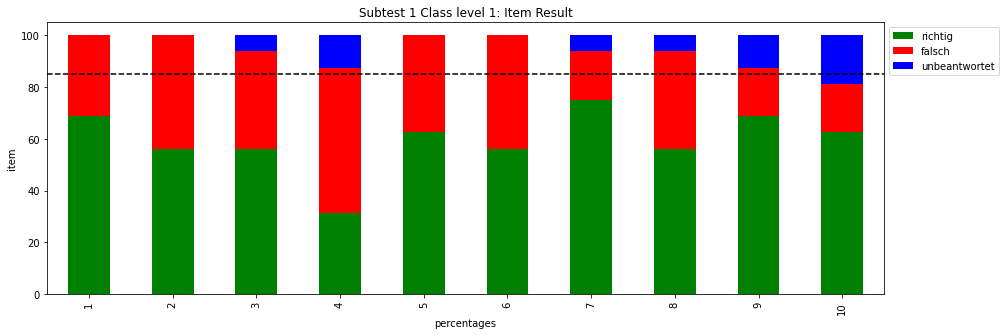

<IPython.core.display.Javascript object>

In [30]:
test1_level_1_frequencies_percentages = getFrequencies(test1_level_1)[0]

plotFrequencies(
    test1_level_1_frequencies_percentages,
    15,
    5,
    "Subtest 1 Class level 1: Item Result",
    legend=legend,
    xlabel="percentages",
    ylabel="item",
    color=colors,
)

#### Class level 2

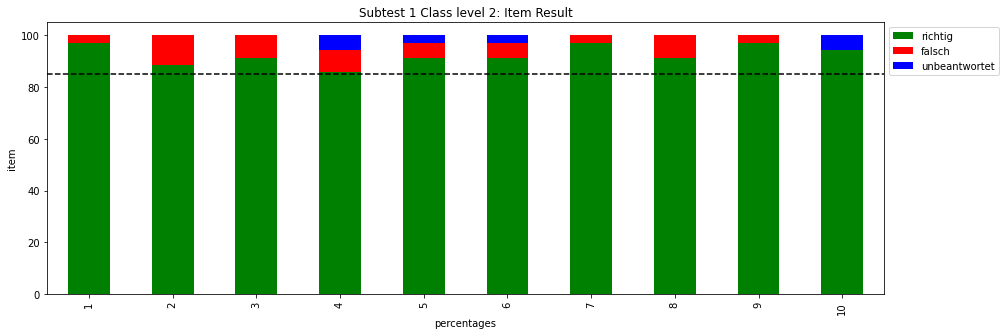

<IPython.core.display.Javascript object>

In [31]:
test1_level_2_frequencies_percentages = getFrequencies(test1_level_2)[0]

plotFrequencies(
    test1_level_2_frequencies_percentages,
    15,
    5,
    "Subtest 1 Class level 2: Item Result",
    legend=legend,
    xlabel="percentages",
    ylabel="item",
    color=colors,
)

### Subtest 2

In [32]:
# class level
grouped2 = test2.groupby(test2.Stufe)
test2_level_1 = grouped2.get_group(1)
test2_level_2 = grouped2.get_group(2)

<IPython.core.display.Javascript object>

#### Class level 1

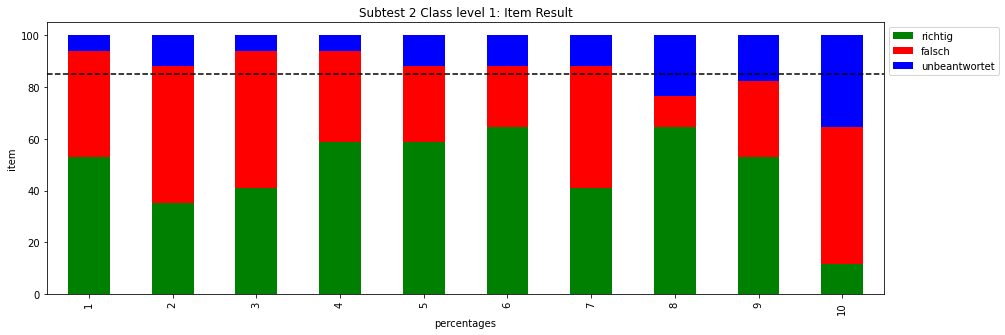

<IPython.core.display.Javascript object>

In [33]:
test2_level_1_frequencies_percentages = getFrequencies(test2_level_1)[0]

plotFrequencies(
    test2_level_1_frequencies_percentages,
    15,
    5,
    "Subtest 2 Class level 1: Item Result",
    legend=legend,
    xlabel="percentages",
    ylabel="item",
    color=colors,
)

#### Class level 2

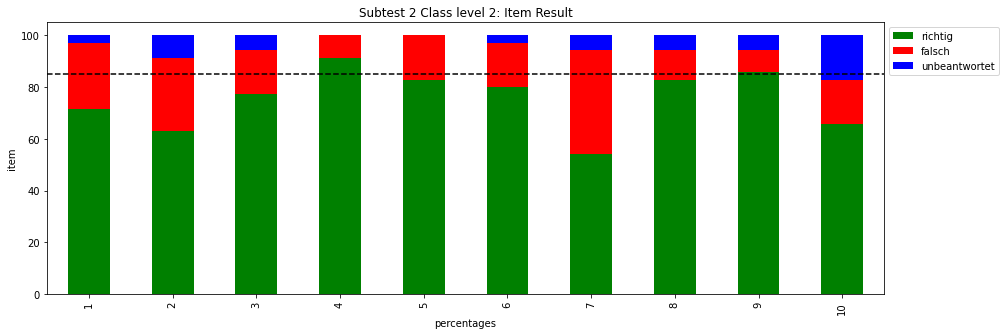

<IPython.core.display.Javascript object>

In [34]:
test2_level_2_frequencies_percentages = getFrequencies(test2_level_2)[0]

plotFrequencies(
    test2_level_2_frequencies_percentages,
    15,
    5,
    "Subtest 2 Class level 2: Item Result",
    legend=legend,
    xlabel="percentages",
    ylabel="item",
    color=colors,
)

### Subtest 3

In [35]:
# class level
grouped3 = test3.groupby(test3.Stufe)
test3_level_1 = grouped3.get_group(1)
test3_level_2 = grouped3.get_group(2)

<IPython.core.display.Javascript object>

#### Class level 1

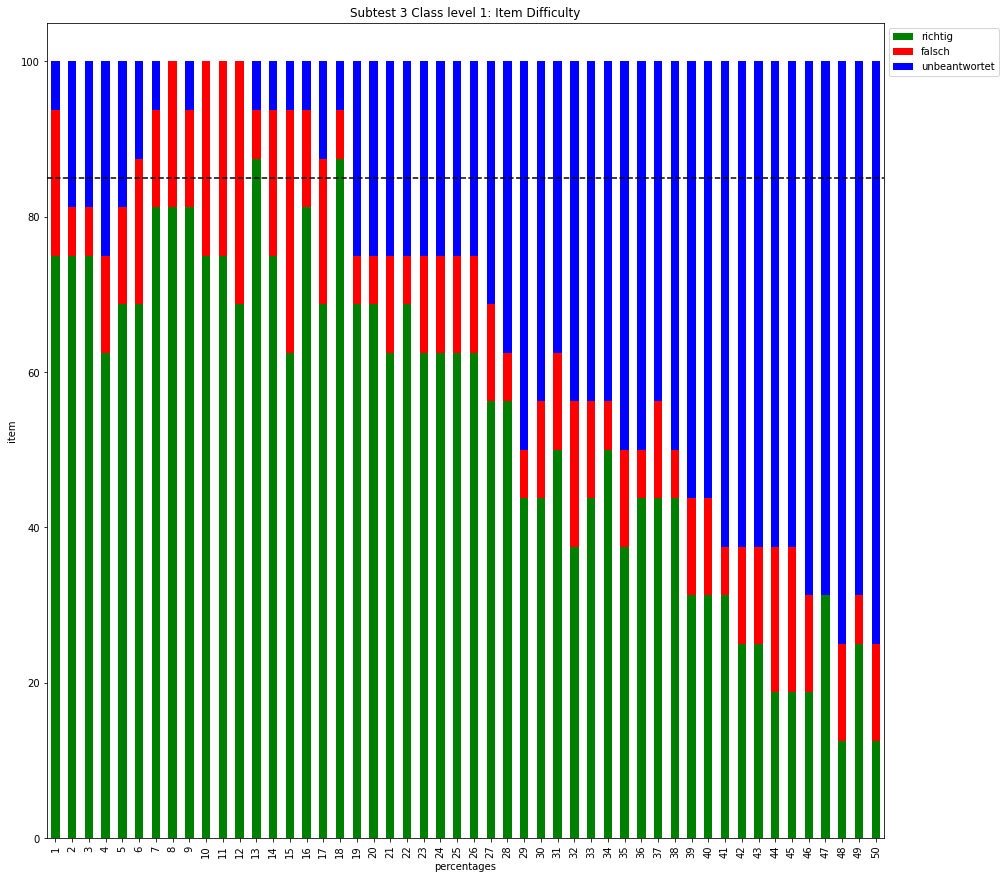

<IPython.core.display.Javascript object>

In [36]:
test3_level_1_frequencies_percentages = getFrequencies(test3_level_1)[0]

plotFrequencies(
    test3_level_1_frequencies_percentages,
    15,
    15,
    "Subtest 3 Class level 1: Item Difficulty",
    legend=legend,
    xlabel="percentages",
    ylabel="item",
    color=colors,
)

#### Class level 2

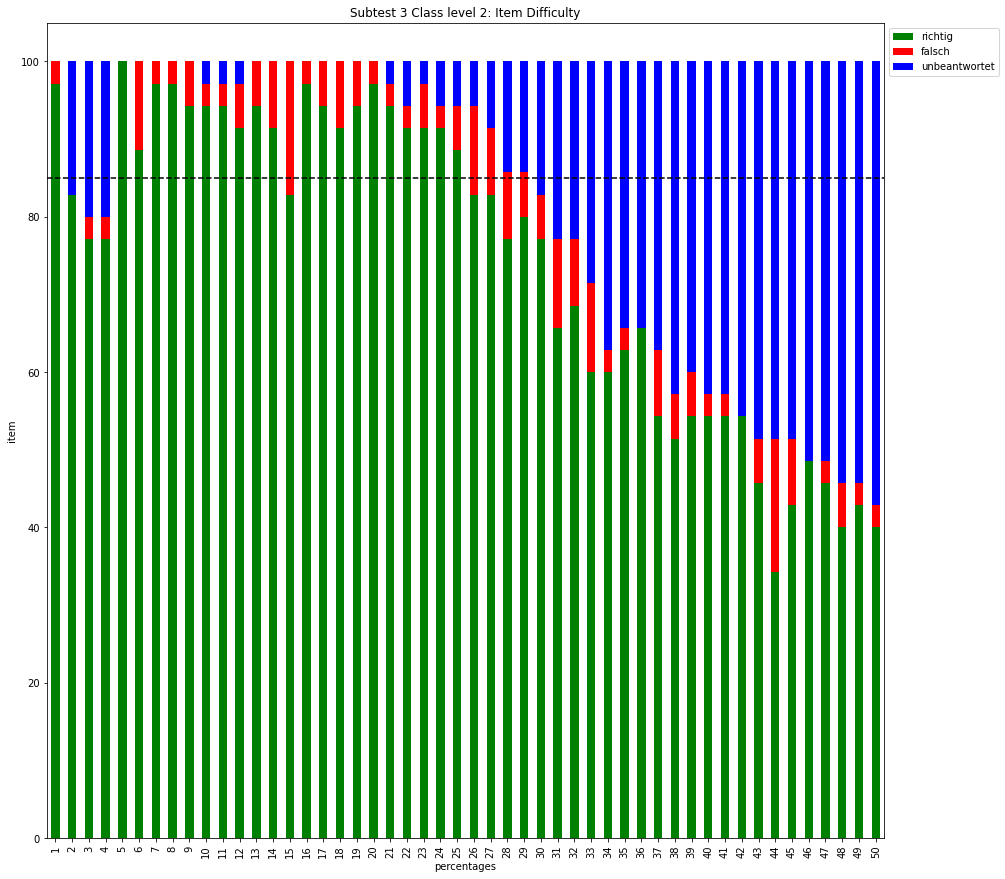

<IPython.core.display.Javascript object>

In [37]:
test3_level_2_frequencies_percentages = getFrequencies(test3_level_2)[0]

plotFrequencies(
    test3_level_2_frequencies_percentages,
    15,
    15,
    "Subtest 3 Class level 2: Item Difficulty",
    legend=legend,
    xlabel="percentages",
    ylabel="item",
    color=colors,
)

### Subtest 4

In [38]:
# class level
grouped4 = test4.groupby(test4.Stufe)
test4_level_1 = grouped4.get_group(1)
test4_level_2 = grouped4.get_group(2)

<IPython.core.display.Javascript object>

#### Class level 1

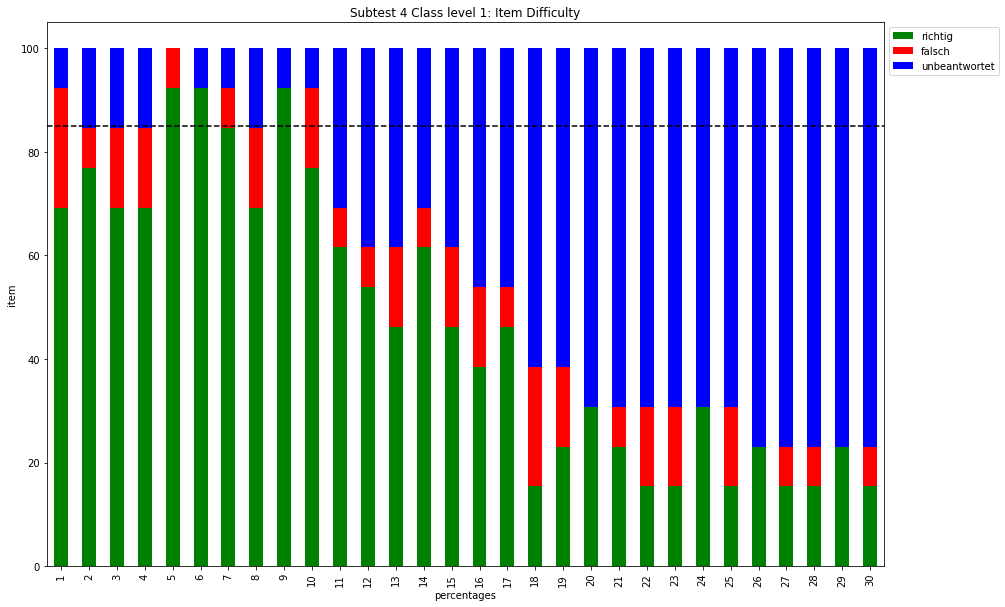

<IPython.core.display.Javascript object>

In [39]:
test4_level_1_frequencies_percentages = getFrequencies(test4_level_1)[0]

plotFrequencies(
    test4_level_1_frequencies_percentages,
    15,
    10,
    "Subtest 4 Class level 1: Item Difficulty",
    legend=legend,
    xlabel="percentages",
    ylabel="item",
    color=colors,
)

#### Class level 2

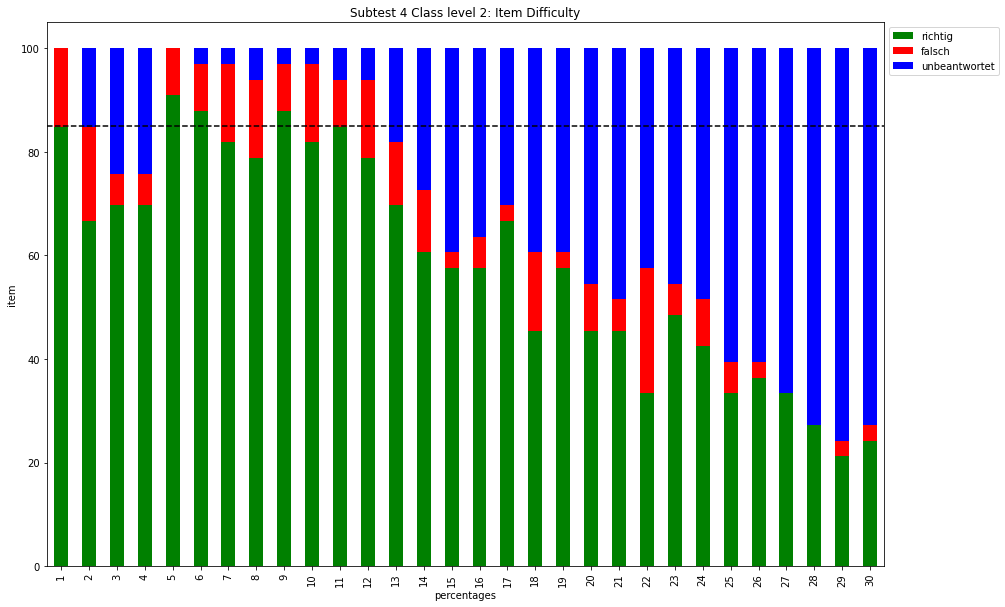

<IPython.core.display.Javascript object>

In [40]:
test4_level_2_frequencies_percentages = getFrequencies(test4_level_2)[0]

plotFrequencies(
    test4_level_2_frequencies_percentages,
    15,
    10,
    "Subtest 4 Class level 2: Item Difficulty",
    legend=legend,
    xlabel="percentages",
    ylabel="item",
    color=colors,
)

## Item discrimination
compare the score on each question against the socre on the test a s a whole.  
If less than 0.1 or even negative the item needs to be reexamined.


In order to formally categorise your stronger and weaker candidates, we create an upper and a lower group in an exam, which are determined by the top and bottom 27% performing candidates. This gives you the same number of candidates in both groups.

You then take the number of candidates from the lower group who got the item correct away from the number of candidates from the upper group who got the item correct, divide by the number of candidates in a group, and you will get a number between -1 and 1. This is the discrimination index for the item.

Of course, if you have sophisticated exam software such as Maxexam then it will calculate the discrimination index for each item for you.
How discriminating is an item?

If an item was fully discriminating (which never happens in reality!), then everyone in your upper group would get it right and everyone in your lower group would get it wrong – leading to a discrimination index of 1.

However, there is no such thing as the ‘perfect’ item, and the general guidelines are as follows:

< 0 – negative discrimination; usually a bad sign. Could indicate a broken item i.e. could have been very misleading, or even mis-keyed (so the wrong option has been selected as the correct one in the system)

0 - 0.2 – not discriminating

0.2 - 0.4 – starting to become discriminating

> 0.4 – strongly discriminating because in practice, it can be difficult to obtain a DI greater than 0.4.

create groups : 25% of lowest and highest performing candidates

In [41]:
ergebnis = test1[
    test1.columns.difference(
        [
            "Unnamed: 0",
            "Test",
            "Stufe",
            "unique_id",
            "Level",
            "Gesamt_Level",
            "Gesamt_Richtig",
        ]
    )
].columns

<IPython.core.display.Javascript object>

In [42]:
test_item_results = ergebnis.to_list()
test_item_results
testItemAnzahl = len(test_item_results)
testItemAnzahl

10

<IPython.core.display.Javascript object>

In [43]:
test1_copy = test1.copy()
test1_copy.replace(99, np.NaN, inplace=True)
test1_copy["sum"] = test1_copy[test_item_results].sum(axis=1)


<IPython.core.display.Javascript object>

In [44]:
test1_copy

,Unnamed: 0,Test,Stufe,unique_id,Level,Gesamt_Level,1,2,3,4,5,6,7,8,9,10,sum
0,0,1,1,404_0,C,C,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0
1,1,1,1,404_1,A,A,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0
2,2,1,1,404_10,B,B,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,6.0
3,3,1,1,404_11,A,A,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0
4,4,1,1,404_12,B,C,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0
5,5,1,1,404_13,A,B,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,NaN,7.0
6,6,1,1,404_2,A,A,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,3.0
7,7,1,1,404_3,C,C,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0
8,8,1,1,404_4,A,B,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
9,9,1,1,404_5,B,C,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0


<IPython.core.display.Javascript object>

In [45]:
import math

percent = 0.25 * len(test1_copy)
print(percent)
percentToWholeNumber = round(percent)
percentToWholeNumber

12.75


13

<IPython.core.display.Javascript object>

In [46]:
test1_copy.sort_values(by=["sum"], ascending=False, inplace=True)
upper_group = test1_copy.head(percentToWholeNumber)
lower_group = test1_copy.tail(percentToWholeNumber)

<IPython.core.display.Javascript object>

In [47]:
lower_group

,Unnamed: 0,Test,Stufe,unique_id,Level,Gesamt_Level,1,2,3,4,5,6,7,8,9,10,sum
45,45,1,2,606_3,B,B,1.0,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,1.0,7.0
37,37,1,2,606_12,B,B,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,7.0
2,2,1,1,404_10,B,B,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,6.0
23,23,1,2,303_16,B,B,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,6.0
36,36,1,2,606_11,B,C,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,6.0
15,15,1,1,505_3,A,B,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,6.0
4,4,1,1,404_12,B,C,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0
14,14,1,1,505_20,A,B,1.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,4.0
1,1,1,1,404_1,A,A,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0
6,6,1,1,404_2,A,A,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,3.0


<IPython.core.display.Javascript object>

In [48]:
upper_group

,Unnamed: 0,Test,Stufe,unique_id,Level,Gesamt_Level,1,2,3,4,5,6,7,8,9,10,sum
25,25,1,2,303_2,C,C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0
28,28,1,2,303_5,C,C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0
26,26,1,2,303_3,B,C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0
30,30,1,2,303_7,C,C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0
24,24,1,2,303_17,C,C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0
31,31,1,2,303_8,C,C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0
22,22,1,2,303_15,C,C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0
21,21,1,2,303_14,C,C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0
20,20,1,2,303_13,C,B,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0
19,19,1,2,303_12,C,C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0


<IPython.core.display.Javascript object>

how many children in the lower group have the item correct?

In [49]:
lower_group["1"]

45    1.0
37    1.0
2     1.0
23    0.0
36    1.0
15    1.0
4     1.0
14    1.0
1     0.0
6     0.0
11    1.0
3     0.0
8     1.0
Name: 1, dtype: float64

<IPython.core.display.Javascript object>

how many children in the upper group have the item correct?

In [50]:
upper_group["1"]

25    1.0
28    1.0
26    1.0
30    1.0
24    1.0
31    1.0
22    1.0
21    1.0
20    1.0
19    1.0
18    1.0
17    1.0
16    1.0
Name: 1, dtype: float64

<IPython.core.display.Javascript object>

In [51]:
upper_1 = upper_group["1"].sum()
upper_group["upper_item1"] = upper_group["1"].sum()

<IPython.core.display.Javascript object>

In [52]:
upper_group

,Unnamed: 0,Test,Stufe,unique_id,Level,Gesamt_Level,1,2,3,4,5,6,7,8,9,10,sum,upper_item1
25,25,1,2,303_2,C,C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,13.0
28,28,1,2,303_5,C,C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,13.0
26,26,1,2,303_3,B,C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,13.0
30,30,1,2,303_7,C,C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,13.0
24,24,1,2,303_17,C,C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,13.0
31,31,1,2,303_8,C,C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,13.0
22,22,1,2,303_15,C,C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,13.0
21,21,1,2,303_14,C,C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,13.0
20,20,1,2,303_13,C,B,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,13.0
19,19,1,2,303_12,C,C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,13.0


<IPython.core.display.Javascript object>

In [53]:
lower_1 = lower_group["1"].sum()
lower_group["lower_item1"] = lower_group["1"].sum()
lower_group

,Unnamed: 0,Test,Stufe,unique_id,Level,Gesamt_Level,1,2,3,4,5,6,7,8,9,10,sum,lower_item1
45,45,1,2,606_3,B,B,1.0,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,1.0,7.0,9.0
37,37,1,2,606_12,B,B,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,7.0,9.0
2,2,1,1,404_10,B,B,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,6.0,9.0
23,23,1,2,303_16,B,B,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,6.0,9.0
36,36,1,2,606_11,B,C,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,6.0,9.0
15,15,1,1,505_3,A,B,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,6.0,9.0
4,4,1,1,404_12,B,C,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,9.0
14,14,1,1,505_20,A,B,1.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,4.0,9.0
1,1,1,1,404_1,A,A,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,9.0
6,6,1,1,404_2,A,A,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,3.0,9.0


<IPython.core.display.Javascript object>

In [54]:
(upper_1 - lower_1) / percentToWholeNumber

0.3076923076923077

<IPython.core.display.Javascript object>

In [55]:
4 / 13

0.3076923076923077

<IPython.core.display.Javascript object>